In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [32]:
df = pd.read_csv(r'C:\Users\ADMIN\Downloads\laptop_da\cleaned_asin_added.csv')
df_laptop = df.loc[df['type'] == 'laptop']
df_laptop
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, 0 to 141
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               133 non-null    object 
 1   price              133 non-null    float64
 2   Link               133 non-null    object 
 3   delivery_date      133 non-null    int64  
 4   lmsales            133 non-null    object 
 5   rating             131 non-null    float64
 6   reviews            131 non-null    float64
 7   other_opts         0 non-null      float64
 8   ship               77 non-null     object 
 9   ASIN               133 non-null    object 
 10  lmsales_converted  133 non-null    int64  
 11  wait_days          133 non-null    int64  
 12  brand              133 non-null    object 
 13  ram                133 non-null    float64
 14  storage_capacity   133 non-null    float64
 15  storage_type       117 non-null    object 
 16  type               133 non-null

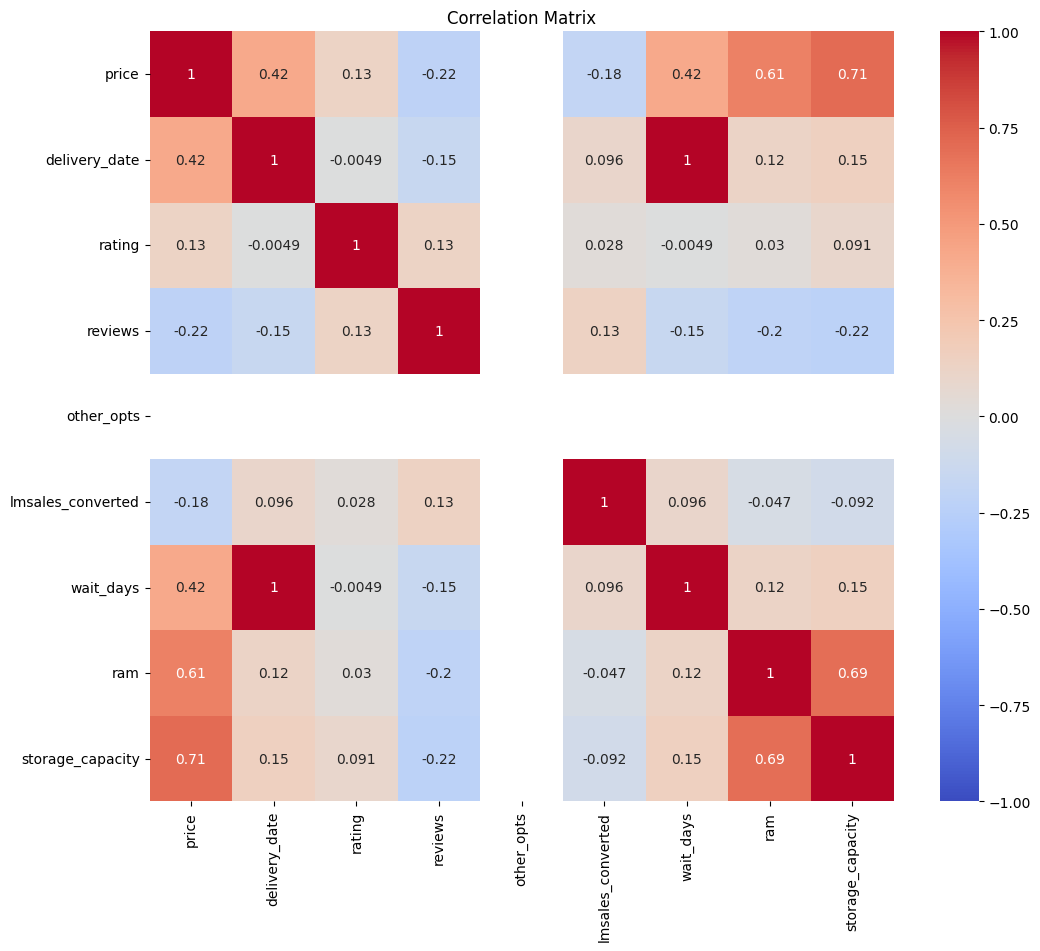

In [33]:
# Lọc các cột số (numeric)
numeric_cols = df_laptop.select_dtypes(include=['float64', 'int64']).columns

# Tính toán ma trận tương quan
corr_matrix = df_laptop[numeric_cols].corr()

# Hiển thị ma trận tương quan bằng heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [34]:
# Lọc các cặp biến có hệ số tương quan tuyệt đối lớn hơn 0.5
threshold = 0.5
high_corr_vars = corr_matrix[(corr_matrix.abs() > threshold) & (corr_matrix.abs() < 1)]
print(high_corr_vars)

                      price  delivery_date  rating  reviews  other_opts  \
price                   NaN            NaN     NaN      NaN         NaN   
delivery_date           NaN            NaN     NaN      NaN         NaN   
rating                  NaN            NaN     NaN      NaN         NaN   
reviews                 NaN            NaN     NaN      NaN         NaN   
other_opts              NaN            NaN     NaN      NaN         NaN   
lmsales_converted       NaN            NaN     NaN      NaN         NaN   
wait_days               NaN            1.0     NaN      NaN         NaN   
ram                0.609663            NaN     NaN      NaN         NaN   
storage_capacity   0.706039            NaN     NaN      NaN         NaN   

                   lmsales_converted  wait_days       ram  storage_capacity  
price                            NaN        NaN  0.609663          0.706039  
delivery_date                    NaN        1.0       NaN               NaN  
rating         

In [ ]:
from sklearn.preprocessing import StandardScaler

# Chuẩn hóa các cột số sử dụng StandardScaler
scaler = StandardScaler()
df_laptop[numeric_cols] = scaler.fit_transform(df_laptop[numeric_cols])

# Tính toán ma trận tương quan
corr_matrix = df_laptop[numeric_cols].corr()

# Hiển thị ma trận tương quan bằng heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
df_laptop.info()

In [36]:
# Select relevant features and target
features = ['lmsales_converted', 'reviews', 'rating', 'wait_days', 'ram', 'storage_capacity']
target = 'price'

# Separate features and target variable
X = df_laptop[features]
y = df_laptop[target]

# Handle missing values and encode categorical variables
numeric_features = ['lmsales_converted', 'reviews', 'rating', 'wait_days', 'ram', 'storage_capacity']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MAE: 206.19259259259263
MSE: 96344.1010814815
RMSE: 310.39346172476235
R2 Score: 0.5176821349849591


In [37]:
new_data = {
    'lmsales_converted': [200, 150],  # Ví dụ giá trị tự nhập
    'reviews': [50, 30],
    'rating': [4.5, 4.0],
    'wait_days': [7, 10],
    'ram': [16, 8],
    'storage_capacity': [512, 256]
}

df_new_data = pd.DataFrame(new_data)

# Dự báo giá với dữ liệu thực tế mới
y_real_pred = model.predict(df_new_data)

# Thêm dự báo giá vào DataFrame của dữ liệu thực tế mới
df_new_data['predicted_price'] = y_real_pred

# In ra DataFrame mới chứa giá dự báo
print(df_new_data)

   lmsales_converted  reviews  rating  wait_days  ram  storage_capacity  \
0                200       50     4.5          7   16               512   
1                150       30     4.0         10    8               256   

   predicted_price  
0           643.32  
1           385.04  


In [38]:
# Select relevant features and target
features = ['lmsales_converted', 'reviews', 'rating', 'wait_days', 'ram', 'storage_capacity']
target = 'price'

# Separate features and target variable
X = df_laptop[features]
y = df_laptop[target]

# Handle missing values and encode categorical variables
numeric_features = ['lmsales_converted', 'reviews', 'rating', 'wait_days', 'ram', 'storage_capacity']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Try multiple models
models = {
    "RandomForest": RandomForestRegressor(),
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor()
}

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    print(f"Model: {model_name}")
    print(f"Cross-Validation R2 Scores: {cv_scores}")
    print(f"Mean CV R2 Score: {cv_scores.mean()}")
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2}")
    print("\n")

# Choose the best model and fine-tune it with GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_features': ['auto', 'sqrt', 'log2'],
    'regressor__max_depth': [10, 20, 30, None]
}

grid_search = GridSearchCV(estimator=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
]), param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation R2 score: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Final Model MAE: {mae}")
print(f"Final Model MSE: {mse}")
print(f"Final Model RMSE: {rmse}")
print(f"Final Model R2 Score: {r2}")

Model: RandomForest
Cross-Validation R2 Scores: [0.89839364 0.79405008 0.75849417 0.90752863 0.00105878]
Mean CV R2 Score: 0.6719050582063499
MAE: 213.40518518518522
MSE: 101931.13528148147
RMSE: 319.266558351296
R2 Score: 0.48971232285467636


Model: LinearRegression
Cross-Validation R2 Scores: [ 0.71810237  0.64600198  0.62693784  0.69769394 -0.65014085]
Mean CV R2 Score: 0.40771905360971383
MAE: 208.65252678408103
MSE: 59310.55824610833
RMSE: 243.53759103290056
R2 Score: 0.7030794671910461


Model: DecisionTree
Cross-Validation R2 Scores: [ 0.62827452  0.5401111   0.37263852  0.52118981 -0.10673417]
Mean CV R2 Score: 0.39109595518347195
MAE: 279.3333333333333
MSE: 194448.07407407407
RMSE: 440.96266743804296
R2 Score: 0.026553998730279305




C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pac

Best parameters found: {'regressor__max_depth': 10, 'regressor__max_features': 'sqrt', 'regressor__n_estimators': 200}
Best cross-validation R2 score: 0.7118674262442991
Final Model MAE: 191.69079938271605
Final Model MSE: 71938.28781686713
Final Model RMSE: 268.2131387849356
Final Model R2 Score: 0.6398625239824041


In [39]:
models = {
    "RandomForest": RandomForestRegressor(),
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor()
}

In [41]:
new_data = {
    'lmsales_converted': [200, 150],
    'reviews': [50, 30],
    'rating': [4.5, 4.0],
    'wait_days': [7, 10],
    'ram': [16, 8],
    'storage_capacity': [512, 256]
}

df_new_data = pd.DataFrame(new_data)

for model_name, model in models.items():
    print(f"Testing Model: {model_name}")
    
    # Tạo pipeline cho mô hình
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Huấn luyện mô hình
    pipeline.fit(X_train, y_train)
    
    # Dự báo trên tập kiểm tra
    y_pred = pipeline.predict(X_test)
    
    # Đánh giá mô hình
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2}")
    
    # Dự báo với dữ liệu thực tế mới
    y_real_pred = pipeline.predict(df_new_data)
    
    # Thêm dự báo giá vào DataFrame của dữ liệu thực tế mới
    df_new_data[f'predicted_price_{model_name}'] = y_real_pred
    
    # In ra DataFrame mới chứa giá dự báo
    print(df_new_data)
    print("\n")

Testing Model: RandomForest
MAE: 214.4577777777778
MSE: 96722.5041925926
RMSE: 311.002418306663
R2 Score: 0.5157877732272859
   lmsales_converted  reviews  rating  wait_days  ram  storage_capacity  \
0                200       50     4.5          7   16               512   
1                150       30     4.0         10    8               256   

   predicted_price_RandomForest  
0                        668.29  
1                        376.79  


Testing Model: LinearRegression
MAE: 208.65252678408103
MSE: 59310.55824610833
RMSE: 243.53759103290056
R2 Score: 0.7030794671910461
   lmsales_converted  reviews  rating  wait_days  ram  storage_capacity  \
0                200       50     4.5          7   16               512   
1                150       30     4.0         10    8               256   

   predicted_price_RandomForest  predicted_price_LinearRegression  
0                        668.29                        816.026983  
1                        376.79                   

Hệ số tương quan giữa 'lmsales_converted' và 'reviews': 0.1342385275510111


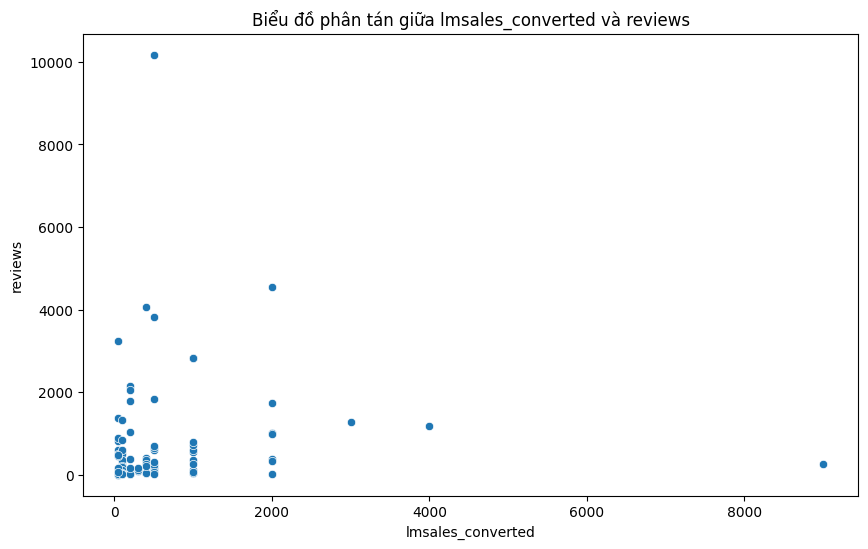

In [42]:
# Xem xét hệ số tương quan giữa 'lmsales_converted' và 'reviews'
corr_lmsales_reviews = df_laptop[['lmsales_converted', 'reviews']].corr().iloc[0, 1]
print(f"Hệ số tương quan giữa 'lmsales_converted' và 'reviews': {corr_lmsales_reviews}")

# Vẽ biểu đồ phân tán
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lmsales_converted', y='reviews', data=df_laptop)
plt.title('Biểu đồ phân tán giữa lmsales_converted và reviews')
plt.xlabel('lmsales_converted')
plt.ylabel('reviews')
plt.show()

     brand    avg_price
0     ASUS  1039.870968
1     Acer   560.818182
2    Apple   200.500000
3     Dell   445.222222
4       HP   336.555556
5       LG   990.500000
6   Lenovo   488.166667
7      MSI  1235.777778
8    Other  1323.000000
9  SAMSUNG  1285.800000


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19272\3649142824.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='brand', y='avg_price', data=avg_price_by_brand, palette='viridis')


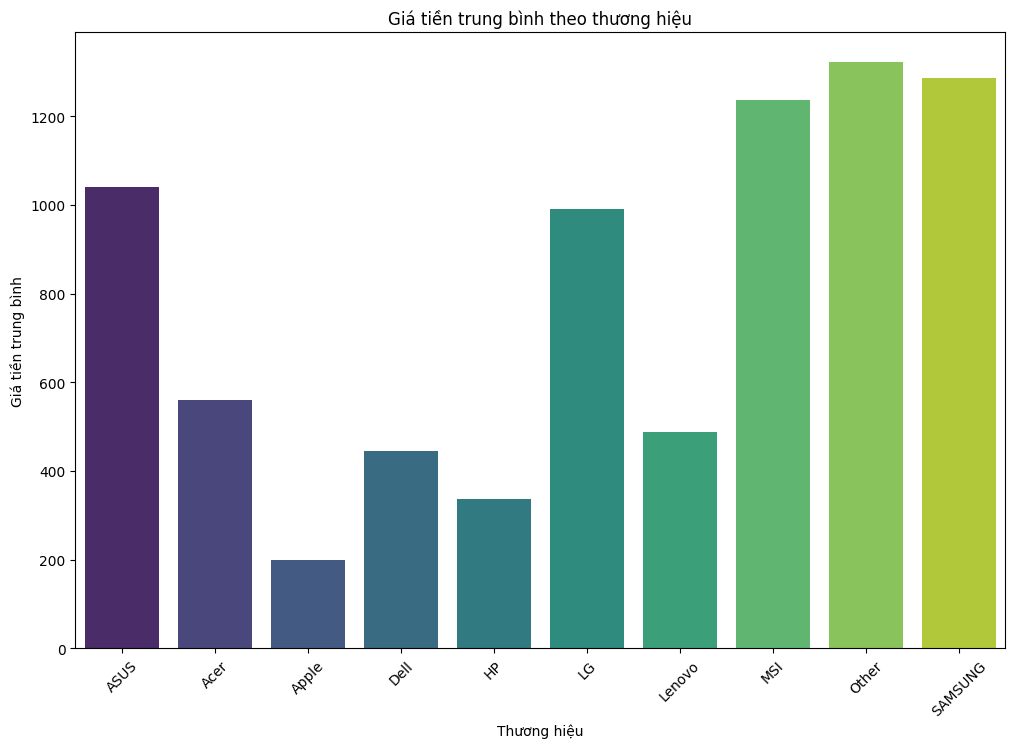

In [43]:
# Tính giá trung bình theo thương hiệu
avg_price_by_brand = df_laptop.groupby('brand')['price'].mean().reset_index()
avg_price_by_brand.columns = ['brand', 'avg_price']

# Hiển thị bảng giá trung bình theo thương hiệu
print(avg_price_by_brand)

# Vẽ biểu đồ cột để so sánh giá trung bình
plt.figure(figsize=(12, 8))
sns.barplot(x='brand', y='avg_price', data=avg_price_by_brand, palette='viridis')
plt.title('Giá tiền trung bình theo thương hiệu')
plt.xlabel('Thương hiệu')
plt.ylabel('Giá tiền trung bình')
plt.xticks(rotation=45)  # Xoay tên thương hiệu để dễ đọc hơn
plt.show()

      brand      cpu_brand    avg_price
0      ASUS            AMD   903.000000
1      ASUS  CPU not found  1299.000000
2      ASUS          Intel  1125.550000
3      ASUS       MediaTek   299.000000
4      Acer            AMD   560.666667
5      Acer  CPU not found   229.000000
6      Acer          Intel   607.571429
7      Acer       MediaTek   239.000000
8     Apple          Intel   200.500000
9      Dell          Intel   445.222222
10       HP            AMD   504.500000
11       HP          Intel   323.120000
12       LG          Intel   990.500000
13   Lenovo            AMD   576.500000
14   Lenovo          Intel   481.538462
15   Lenovo       MediaTek   221.000000
16      MSI  CPU not found  1519.000000
17      MSI          Intel  1200.375000
18    Other            AMD   429.000000
19    Other          Intel  2217.000000
20  SAMSUNG          Intel  1285.800000


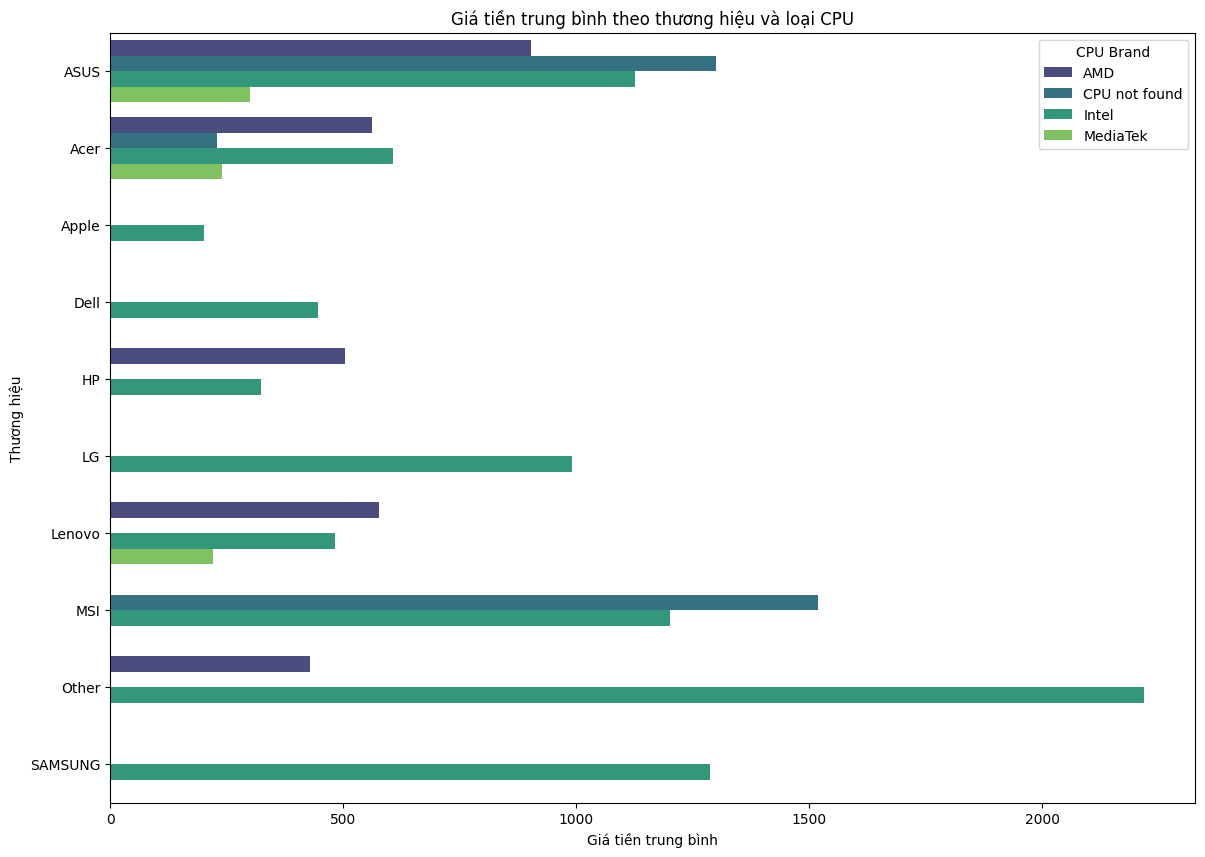

In [44]:
# Tính giá trung bình theo kết hợp của brand và cpu_brand
avg_price_by_brand_cpu = df_laptop.groupby(['brand', 'cpu_brand'])['price'].mean().reset_index()
avg_price_by_brand_cpu.columns = ['brand', 'cpu_brand', 'avg_price']

# Hiển thị bảng giá trung bình theo brand và cpu_brand
print(avg_price_by_brand_cpu)

# Vẽ biểu đồ cột để so sánh giá trung bình
plt.figure(figsize=(14, 10))
sns.barplot(x='avg_price', y='brand', hue='cpu_brand', data=avg_price_by_brand_cpu, palette='viridis')
plt.title('Giá tiền trung bình theo thương hiệu và loại CPU')
plt.xlabel('Giá tiền trung bình')
plt.ylabel('Thương hiệu')
plt.legend(title='CPU Brand')
plt.show()

brand
ASUS       31
HP         27
Acer       22
Lenovo     18
MSI         9
Dell        9
LG          8
SAMSUNG     5
Other       2
Apple       2
Name: count, dtype: int64


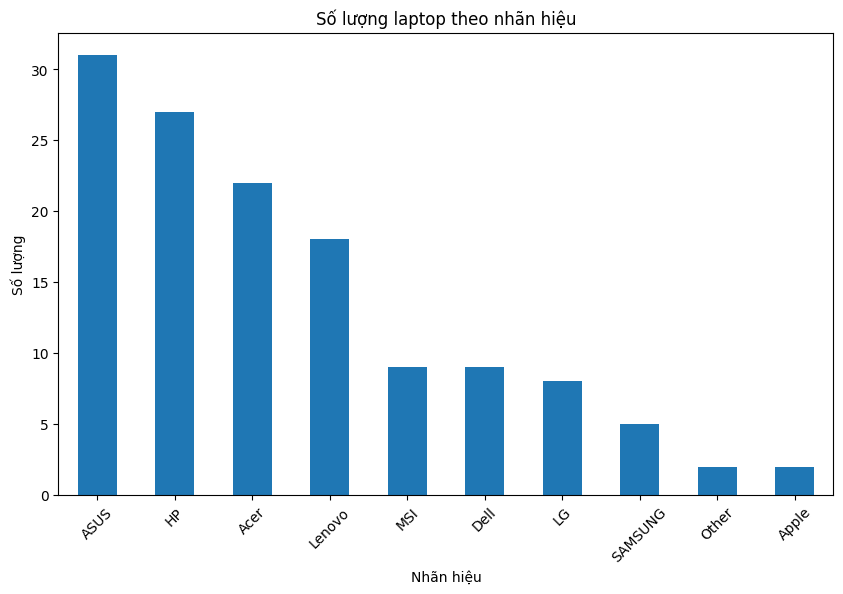

In [45]:
brand_counts = df_laptop['brand'].value_counts()
print(brand_counts)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
brand_counts.plot(kind='bar')
plt.title('Số lượng laptop theo nhãn hiệu')
plt.xlabel('Nhãn hiệu')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.show()

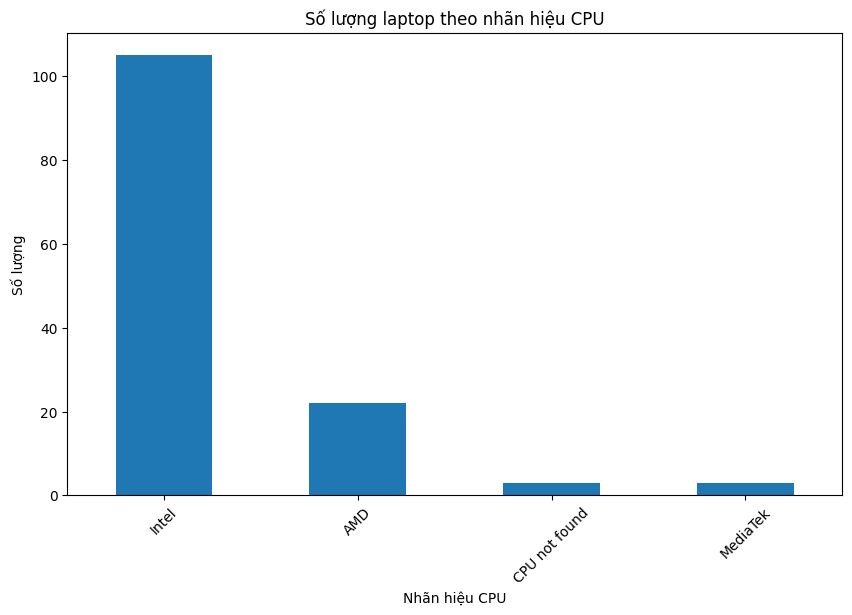

In [46]:
cpu_counts = df_laptop['cpu_brand'].value_counts()
cpu_counts
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
cpu_counts.plot(kind='bar')
plt.title('Số lượng laptop theo nhãn hiệu CPU')
plt.xlabel('Nhãn hiệu CPU')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.show()

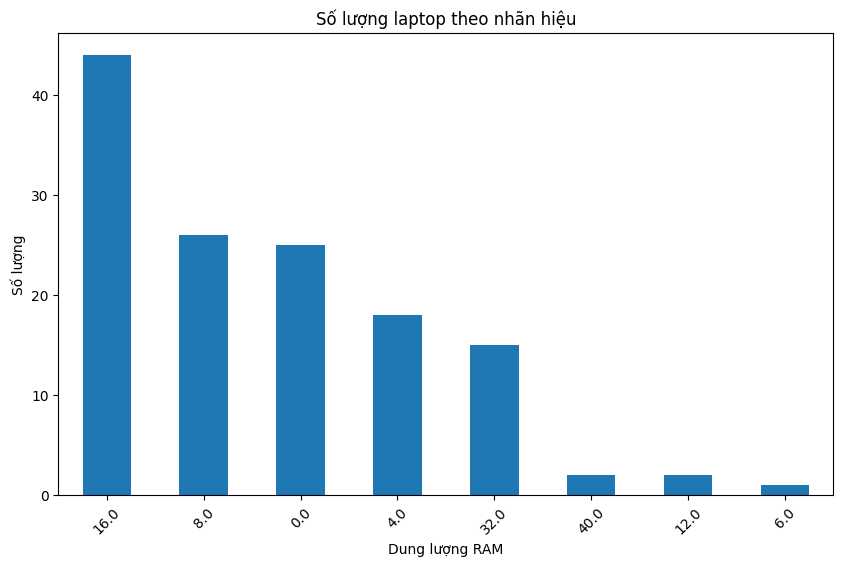

In [47]:
ram_counts = df_laptop['ram'].value_counts()
ram_counts
plt.figure(figsize=(10, 6))
ram_counts.plot(kind='bar')
plt.title('Số lượng laptop theo nhãn hiệu')
plt.xlabel('Dung lượng RAM')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.show()

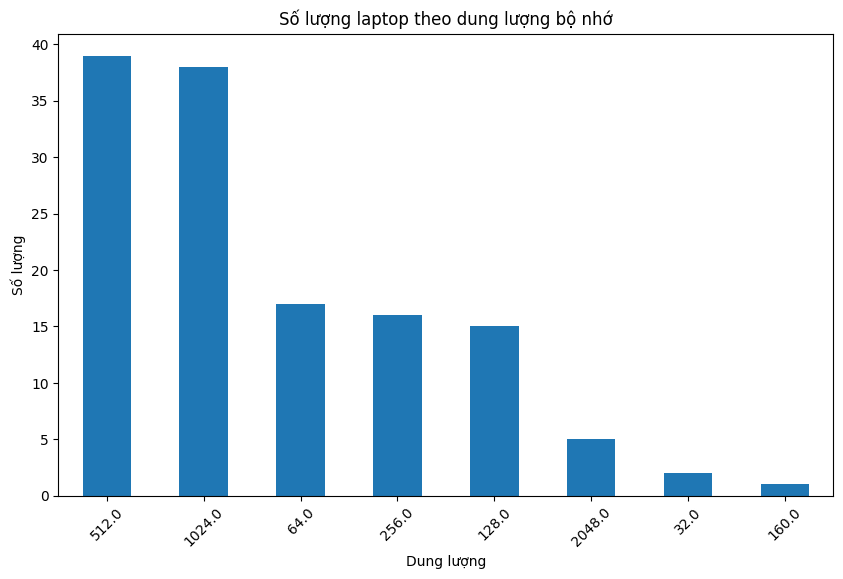

In [48]:
capacity_counts = df_laptop['storage_capacity'].value_counts()
capacity_counts
plt.figure(figsize=(10, 6))
capacity_counts.plot(kind='bar')
plt.title('Số lượng laptop theo dung lượng bộ nhớ')
plt.xlabel('Dung lượng')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.show()

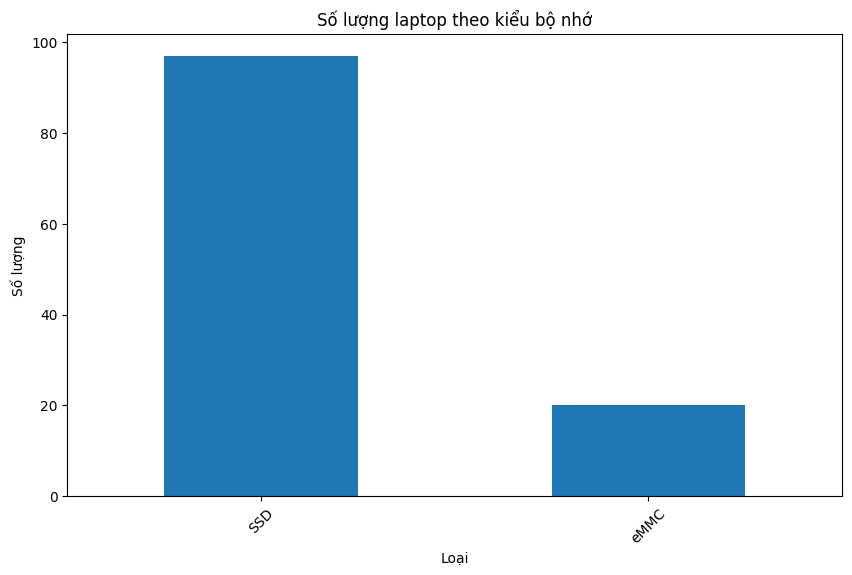

In [49]:
capacity_counts = df_laptop['storage_type'].value_counts()
capacity_counts
plt.figure(figsize=(10, 6))
capacity_counts.plot(kind='bar')
plt.title('Số lượng laptop theo kiểu bộ nhớ')
plt.xlabel('Loại')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19272\1324121157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_laptop['rating'] = pd.to_numeric(df_laptop['rating'], errors='coerce')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19272\1324121157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_laptop['lmsales_converted'] = pd.to_numeric(df_laptop['lmsales_converted'], errors='coerce')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19272\1324121157.py:4: SettingWithCopyWarning: 
A value is trying to be 

name                  object
price                float64
Link                  object
delivery_date          int64
lmsales               object
rating               float64
reviews              float64
other_opts           float64
ship                  object
ASIN                  object
lmsales_converted      int64
wait_days              int64
brand                 object
ram                  float64
storage_capacity     float64
storage_type          object
type                  object
cpu_brand             object
dtype: object
         rating  lmsales_converted      reviews
brand                                          
ASUS   4.144828         480.645161   207.517241
Acer   4.350000         522.727273  1180.136364
Apple  4.150000         600.000000  1432.500000
Dell   4.122222         272.222222   294.666667
HP     4.277778         533.333333   747.333333


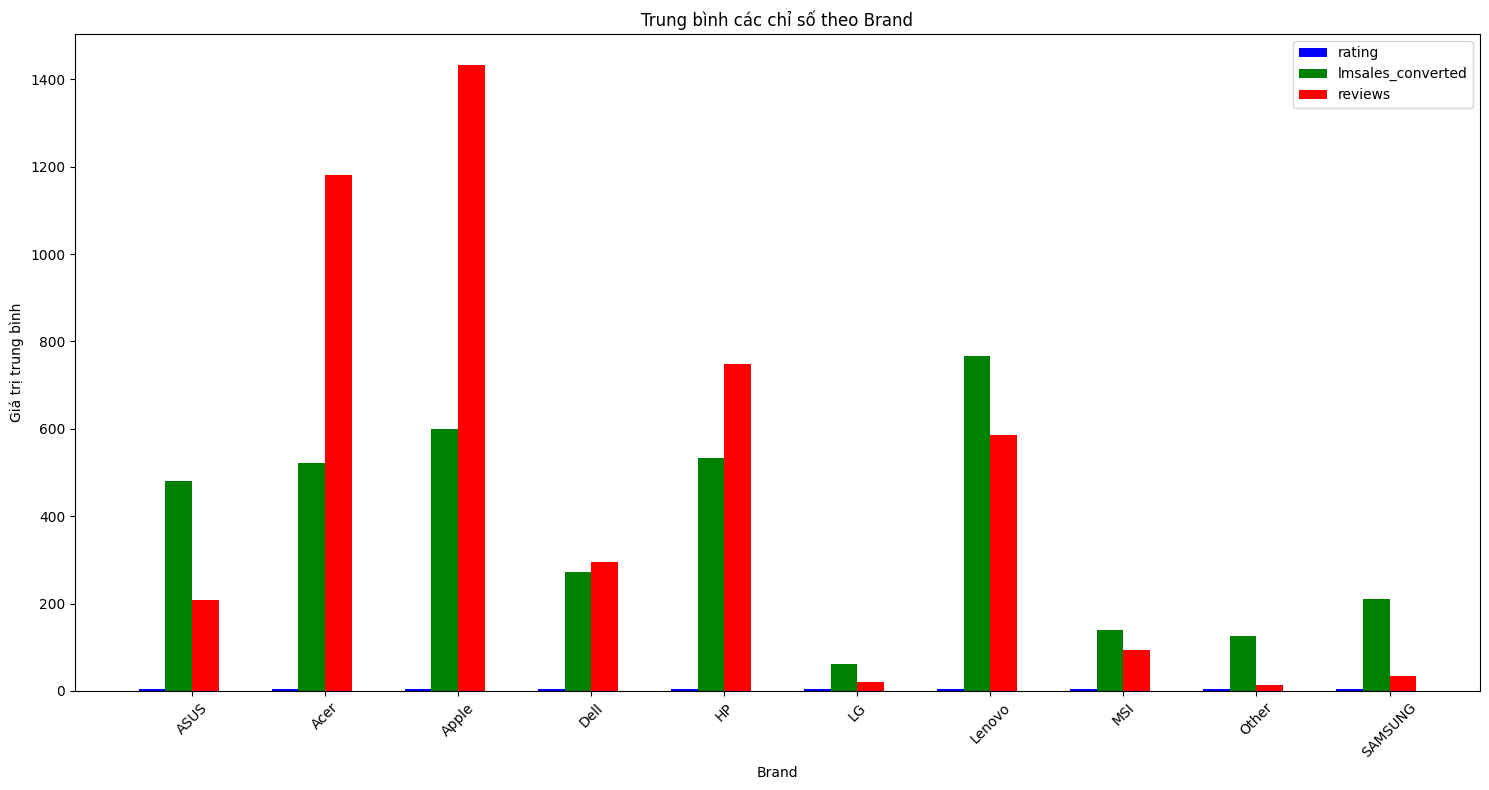

In [50]:
# Chuyển đổi các cột sang kiểu dữ liệu số nếu cần thiết
df_laptop['rating'] = pd.to_numeric(df_laptop['rating'], errors='coerce')
df_laptop['lmsales_converted'] = pd.to_numeric(df_laptop['lmsales_converted'], errors='coerce')
df_laptop['reviews'] = pd.to_numeric(df_laptop['reviews'], errors='coerce')

# Kiểm tra các cột để đảm bảo chúng đã được chuyển đổi thành công
print(df_laptop.dtypes)

# Nhóm dữ liệu theo brand và tính giá trị trung bình cho từng chỉ số
grouped_df = df_laptop.groupby('brand')[['rating', 'lmsales_converted', 'reviews']].mean()

# Kiểm tra kết quả của groupby và mean
print(grouped_df.head())

# Tạo DataFrame chứa các giá trị trung bình
brands = grouped_df.index
avg_values = grouped_df.values.T

# Vẽ biểu đồ cột cho từng chỉ số theo brand
fig, ax = plt.subplots(figsize=(15, 8))

bar_width = 0.2
index = np.arange(len(brands))

# Vẽ các cột cho từng chỉ số
for i, (metric, color) in enumerate(zip(['rating', 'lmsales_converted', 'reviews'], ['blue', 'green', 'red'])):
    plt.bar(index + i * bar_width, avg_values[i], bar_width, label=metric, color=color)

plt.title('Trung bình các chỉ số theo Brand')
plt.xlabel('Brand')
plt.ylabel('Giá trị trung bình')
plt.xticks(index + bar_width * 1.5, brands, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()